# Required Imports

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import linear_model

# Setting the boundaries

In [110]:
df = pd.read_csv('D:\EXCELR\Assignments\Completed\MLR\ToyotaCorolla - MLR.csv')

In [111]:
three_years = df[(df.Age_08_04 >= 36)]
four_years = df[(df.Age_08_04 >= 48)]
five_years = df[(df.Age_08_04 >= 60)]
six_years = df[(df.Age_08_04 >= 72)]

three_years_old = len(three_years)
four_years_old = len(four_years)
five_years_old = len(five_years)
six_years_old = len(six_years)

total_cars = len(df)

print(f"Number of cars older than 3 years: {three_years_old}, and they are {three_years_old/total_cars:.2f}%")
print(f"Number of cars older than 4 years: {four_years_old}, and they are {four_years_old/total_cars:.2f}%")
print(f"Number of cars older than 5 years: {five_years_old}, and they are {five_years_old/total_cars:.2f}%")
print(f"Number of cars older than 6 years: {six_years_old}, and they are {six_years_old/total_cars:.2f}%")

Number of cars older than 3 years: 1215, and they are 0.85%
Number of cars older than 4 years: 1034, and they are 0.72%
Number of cars older than 5 years: 754, and they are 0.53%
Number of cars older than 6 years: 319, and they are 0.22%


In [112]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# EDA

In [113]:
df.Price.describe()

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

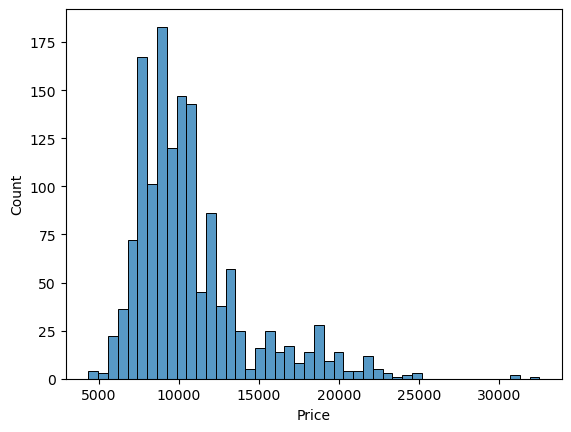

In [114]:
sns.histplot(df["Price"])

In [115]:
expensive_cars = df[df['Price'] >= 25000]
len(expensive_cars)

3

In [116]:
df.rename(columns={'Age_08_04':'Age'}, inplace=True)

In [117]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [118]:
df.Age.describe()

count    1436.000000
mean       55.947075
std        18.599988
min         1.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age, dtype: float64

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Years', ylabel='Count'>

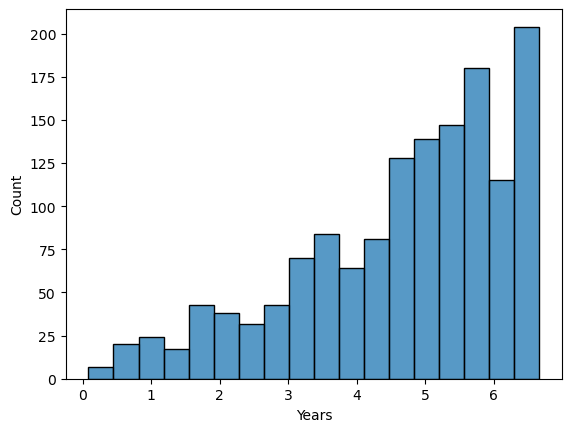

In [119]:
x = df["Age"] / 12
plt.xlabel('Years')
sns.histplot(x)

In [120]:
df.KM.describe()

count      1436.000000
mean      68533.259749
std       37506.448872
min           1.000000
25%       43000.000000
50%       63389.500000
75%       87020.750000
max      243000.000000
Name: KM, dtype: float64

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='KM', ylabel='Count'>

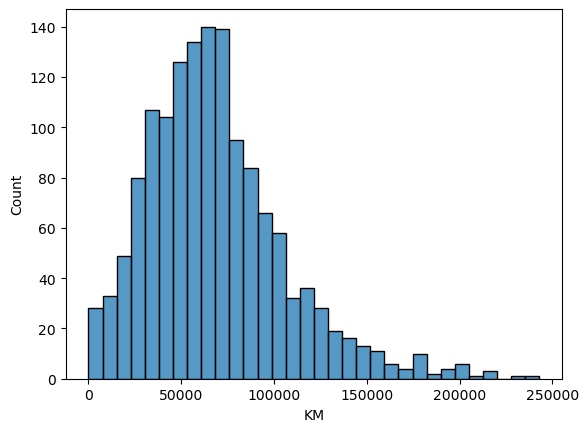

In [121]:
sns.histplot(df["KM"])

In [122]:
less_used_cars = df[df['KM'] < 1000]
len(less_used_cars)

11

In [123]:
df.Fuel_Type.describe()


count       1436
unique         3
top       Petrol
freq        1264
Name: Fuel_Type, dtype: object

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fuel_Type', ylabel='Count'>

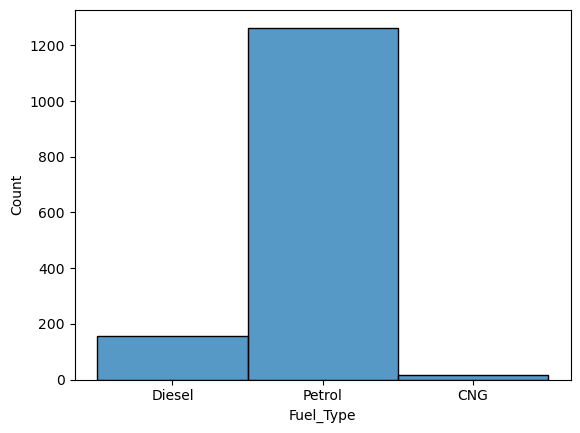

In [124]:
sns.histplot(df["Fuel_Type"])

In [125]:
# HP
df.HP.describe()

count    1436.000000
mean      101.502089
std        14.981080
min        69.000000
25%        90.000000
50%       110.000000
75%       110.000000
max       192.000000
Name: HP, dtype: float64

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HP', ylabel='Count'>

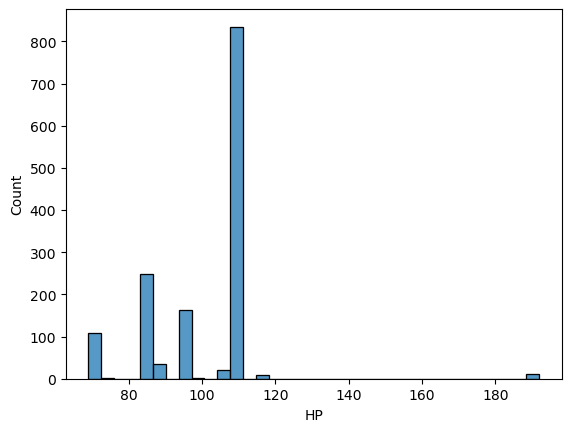

In [126]:
sns.histplot(df["HP"])

In [127]:
powered_up = df[df['HP'] > 120]
len(powered_up)

11

In [128]:
df.HP.value_counts()

HP
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: count, dtype: int64

In [129]:
# Automatic
df["Automatic"].value_counts()


Automatic
0    1356
1      80
Name: count, dtype: int64

In [130]:
# CC
# That max amount is obviously not a valid input. But let's check how many we have such high values
high_cc = df[df['cc'] > 1600]
len(high_cc)

167

In [131]:
# 167 cars

In [132]:
df[df['cc'] > 1600].cc.describe()

count      167.000000
mean      2048.892216
std       1087.889163
min       1800.000000
25%       1900.000000
50%       2000.000000
75%       2000.000000
max      16000.000000
Name: cc, dtype: float64

In [133]:
high_cc = df[df['cc'] > 2000]
len(high_cc)

1

In [134]:
df['cc'] = df['cc'].replace(16000, 1600)

In [135]:
df.cc.describe()

count    1436.000000
mean     1566.827994
std       187.182436
min      1300.000000
25%      1400.000000
50%      1600.000000
75%      1600.000000
max      2000.000000
Name: cc, dtype: float64

In [136]:
df["cc"].value_counts()

cc
1600    846
1300    248
1400    164
2000    119
1900     30
1800     14
1598      4
1587      4
1995      2
1398      2
1332      2
1975      1
Name: count, dtype: int64

In [137]:
df["cc"] = df["cc"].round(-2)
df["cc"].value_counts()

cc
1600    854
1300    250
1400    166
2000    122
1900     30
1800     14
Name: count, dtype: int64

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cc', ylabel='Count'>

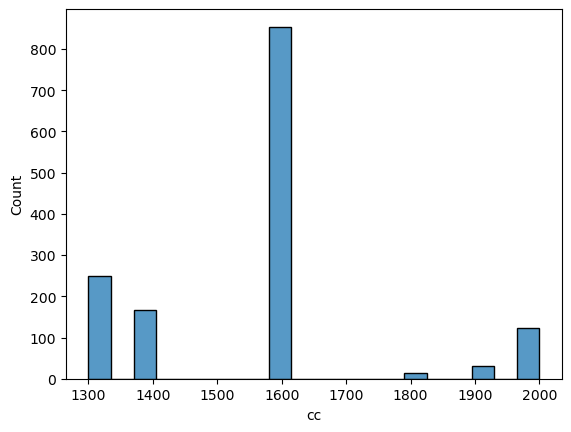

In [138]:
sns.histplot(df["cc"])

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Doors', ylabel='Count'>

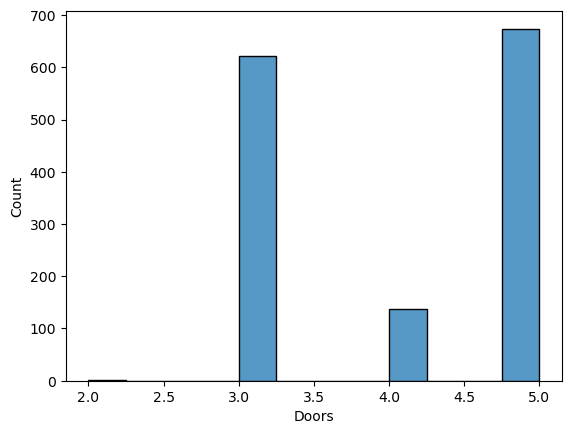

In [139]:
sns.histplot(df["Doors"])

In [140]:
df["Doors"].value_counts()

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

In [141]:
df["Cylinders"].value_counts()

Cylinders
4    1436
Name: count, dtype: int64

In [142]:
df["Gears"].value_counts()

Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

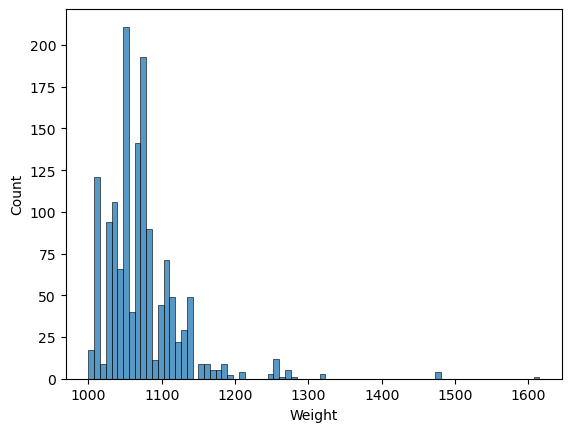

In [143]:
df.Weight.describe()

# Standard deviation is not high, it means data points are close to the mean. Let's check the plot too.
sns.histplot(df["Weight"])


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


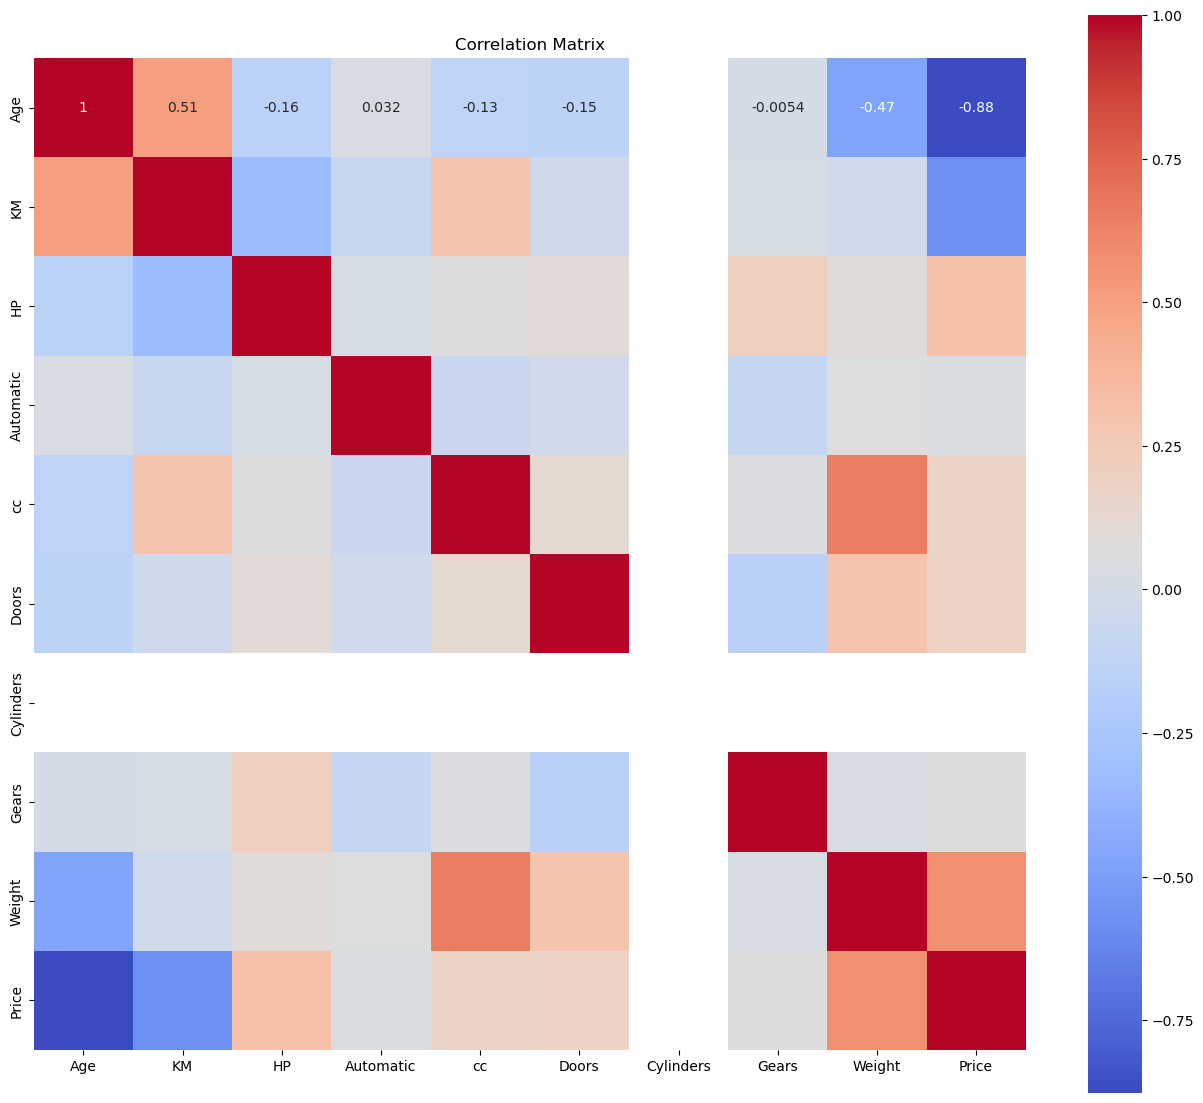

In [144]:
# Correlation
plt.figure(figsize=(16, 14))
df_filtered = df.filter(['Age', 'KM', 'HP','Automatic', 'cc', 'Doors','Cylinders','Gears','Weight',  'Price'], axis=1)

corr = df_filtered.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Linear Regression Model Fitting

In [195]:
y= df['Price'].values
X_init= df[['Age', 'KM', 'HP', 'Automatic', 'Doors','cc','Gears','Weight']].values

In [196]:
regr_init = linear_model.LinearRegression() 
regr_init.fit(X_init, y)

LinearRegression()

In [197]:
# Getting the coefficiencies with a formatter to better read.
np.set_printoptions(formatter={'float_kind':'{:.2f}'.format})

# Rounding to two decimal points.
print("coefficients: ", np.around(regr_init.coef_,2))
print("Intercept: ", np.around(regr_init.intercept_,2))


coefficients:  [-122.51 -0.02 30.74 249.64 -29.78 -1.59 630.02 22.31]
Intercept:  -8862.58


In [198]:
# Assuming 'y' should have the same number of samples as the features in 'X_init'
# y = df['Price'].values 
# X_init = df[['Age', 'KM', 'HP', 'Automatic', 'Doors','cc','Gears','Weight']].values

# # Verify shapes
# print(X_init.shape)
# print(y.shape)

# # Proceed with regression models if shapes are consistent
# regr_init = linear_model.LinearRegression() 
# regr_init.fit(X_init, y)
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha (regularization strength) as needed
lasso.fit(X_init, y)

# Ridge Regression
ridge = Ridge(alpha=0.1)  # Adjust alpha (regularization strength) as needed
ridge.fit(X_init, y)

# Print coefficients for comparison
print("Original Linear Regression Coefficients:", regr_init.coef_)
print("Lasso Regression Coefficients:", lasso.coef_)
print("Ridge Regression Coefficients:", ridge.coef_)

Original Linear Regression Coefficients: [-122.51 -0.02 30.74 249.64 -29.78 -1.59 630.02 22.31]
Lasso Regression Coefficients: [-122.50 -0.02 30.75 247.39 -29.82 -1.59 626.76 22.31]
Ridge Regression Coefficients: [-122.51 -0.02 30.75 249.17 -29.84 -1.59 628.61 22.31]


In [201]:
# Linear Model for few variables
y= df['Price'].values
X_study= df[['Age', 'KM', 'HP', 'Automatic','cc']].values

regr_study = linear_model.LinearRegression() 
regr_study.fit(X_study, y)
               
print(np.around(regr_study.coef_,2))
print("Intercept: ", np.around(regr_study.intercept_,2))
print("\n")
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha (regularization strength) as needed
lasso.fit(X_study, y)

# Ridge Regression
ridge = Ridge(alpha=0.1)  # Adjust alpha (regularization strength) as needed
ridge.fit(X_study, y)

# Print coefficients for comparison
print("Original Linear Regression Coefficients:", regr_init.coef_)
print("Lasso Regression Coefficients:", lasso.coef_)
print("Ridge Regression Coefficients:", ridge.coef_)


[-146.93 -0.02 31.95 770.82 2.21]
Intercept:  13358.26


Original Linear Regression Coefficients: [-122.51 -0.02 30.74 249.64 -29.78 -1.59 630.02 22.31]
Lasso Regression Coefficients: [-146.93 -0.02 31.95 768.89 2.21]
Ridge Regression Coefficients: [-146.93 -0.02 31.95 769.79 2.21]


In [155]:
# Linear Model for Older and Newer Cars

In [203]:
older_cars = df[(df.Age >= 60)]
newer_cars = df[(df.Age < 60)]

In [204]:
y= older_cars['Price'].values
X_older= older_cars[['Age', 'KM', 'HP', 'Automatic','cc','Weight']].values

In [181]:
regr_older = linear_model.LinearRegression() 
regr_older.fit(X_older, y)

LinearRegression()

In [202]:
print(np.around(regr_older.coef_,2))
print("Intercept: ", np.around(regr_older.intercept_,2))
print("\n")
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha (regularization strength) as needed
lasso.fit(X_older, y)

# Ridge Regression
ridge = Ridge(alpha=0.1)  # Adjust alpha (regularization strength) as needed
ridge.fit(X_older, y)

# Print coefficients for comparison
print("Original Linear Regression Coefficients:", regr_init.coef_)
print("Lasso Regression Coefficients:", lasso.coef_)
print("Ridge Regression Coefficients:", ridge.coef_)



[-89.39 -0.01 9.49 422.16 0.27 6.06]
Intercept:  8147.47




ValueError: Found input variables with inconsistent numbers of samples: [754, 1436]

In [183]:
y= newer_cars['Price'].values
X_newer= newer_cars[['Age', 'KM', 'HP', 'Automatic','cc','Weight']].values

In [184]:
regr_newer = linear_model.LinearRegression() 
regr_newer.fit(X_newer, y)

LinearRegression()

In [185]:
print(np.around(regr_newer.coef_,2))
print("Intercept: ", np.around(regr_newer.intercept_,2))

[-147.69 -0.02 45.76 133.11 -0.60 21.29]


In [163]:
# Before I put all these digits into a table, I'll get the average price for all mentioned age groups too. Because comparing the results alone wouldn't reflect their proportions within the groups.

In [186]:
avg_all = df['Price'].mean()
avg_older = older_cars['Price'].mean()
avg_newer = newer_cars['Price'].mean()

print(f"Average price for all cars: {avg_all:.2f} €")
print(f"Average price for older cars: {avg_older:.2f} €")
print(f"Average price for newer cars: {avg_newer:.2f} €")

Average price for all cars: 10730.82 €
Average price for older cars: 8586.91 €
Average price for newer cars: 13101.07 €


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

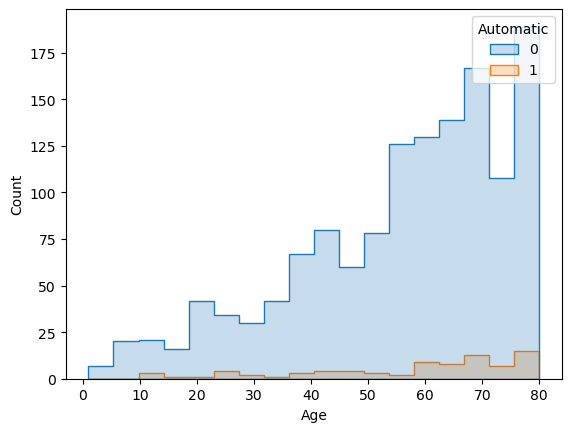

In [187]:
sns.histplot(df, x="Age", hue="Automatic", element="step")

In [166]:
#Although it is weak, the non-automatic cars distribution follows similar pattern with the automatic ones. 50 out of 80 automatic cars were over 5 years old. That's why I kept them in the variables. Said that, I did not do the same for Automatic Air Conditioning, even though it gave very positive digits. Because only 4 out of 81 cars with automatic airco were over 5 years old.

# conclusion

# 7.1 Do These
If the car has an automatic gear, start your bargain with it. Tell them how smoothly it works!
The same goes for your cool air conditioning. (If you did change the filter, you can mention that too. But don't forget: No data is shown above related to any filter.)
While telling all of these, roll up and down your powered windows. Show them who has the power!
If your car is still under the manufacturer's guarantee, you should definetely talk about it.
If you feel the vibe is positive, add some flavors by telling about your mist lamps and metallic rims. But don't rely on these much.

#  Don't Do These
If your car has a strong engine, better not brag about your horses!
If your car's sportive outlook is all about that backseat divider, don't even mention it.
Never, ever think to tell how 'good' your car is by reasoning it with its ability to pull heavy carriers with that tow bar. If the dealers use the tow bar as an argument for price cut, tell that you only carried your 5-years-old kid's bicycle on that. (Again, there is no data above about any kid's bike)